# Iris Dataset: EDA and Classification

![iris](./img/iris_dataset.png)

## Iris Dataset: Simple Exploratory Data Analysis (EDA)

#### Import Modules

In [1]:
import numpy as np # operasi numerik
import pandas as pd # olah dan analisis data

#### Load dataset

In [2]:
iris_df = pd.read_csv('./dataset/iris/Iris.csv') # memuat file csv sebagai data frame
iris_df.head() # tampilkan 5 baris pertama

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Drop column 'Id'

In [3]:
# iris_df = iris_df.drop(columns='Id')
iris_df.drop(columns='Id', inplace=True) # menghapus kolom bernama 'Id'
iris_df.head() # tampilkan 5 baris pertama

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Identify the shape of the datatset

In [4]:
iris_df.shape # bentuk/dimensi dataset (baris,kolom)

(150, 5)

#### Get the list of columns

In [5]:
# iris_df.keys()
iris_df.columns # daftar nama kolom

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Identify data types for each column

In [6]:
iris_df.dtypes # tipe data untuk tiap kolom

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Get bassic dataset information

In [7]:
iris_df.info() # informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Identify missing values

In [8]:
# iris_df.isnull().values.any()
iris_df.isna().values.any() # mendeteksi keberadaan nilai kosong

False

#### Identify duplicate entries/rows

In [9]:
# iris_df[iris_df.duplicated(keep=False)] # tampilkan seluruh baris dengan duplikasi
iris_df[iris_df.duplicated()] # tampilkan hanya baris duplikasi sekunder

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
iris_df.duplicated().value_counts() # hitung jumlah duplikasi data

False    147
True       3
dtype: int64

#### Drop duplicate entries/rows

In [11]:
iris_df.drop_duplicates(inplace=True) # menghapus duplikasi data

#### Describe the dataset

In [12]:
iris_df.describe() # deskripsi data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Correlation

In [13]:
iris_df.corr() # korelasi antar kolom

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


## Iris Dataset: Data Visualisation

#### Import Modules

In [14]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data
%matplotlib notebook 

#### Heatmap

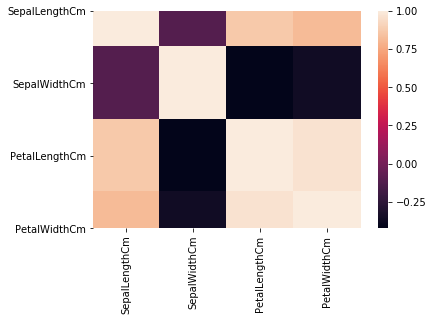

In [15]:
sns.heatmap(data=iris_df.corr())

#### Bar Plot

In [16]:
iris_df['Species'].value_counts() # menghitung jumlah setiap species

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

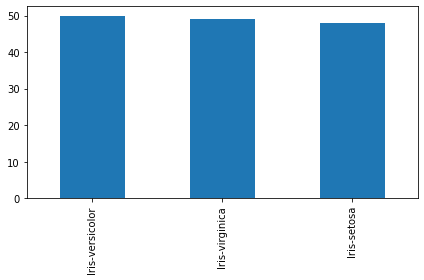

In [17]:
iris_df['Species'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

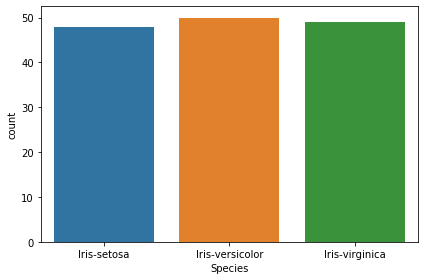

In [18]:
sns.countplot(x='Species', data=iris_df)
plt.tight_layout()

#### Pie Chart

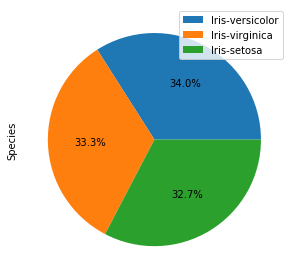

In [19]:
iris_df['Species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

#### Line Plot

Text(0.5, 1.0, 'Petal Width')

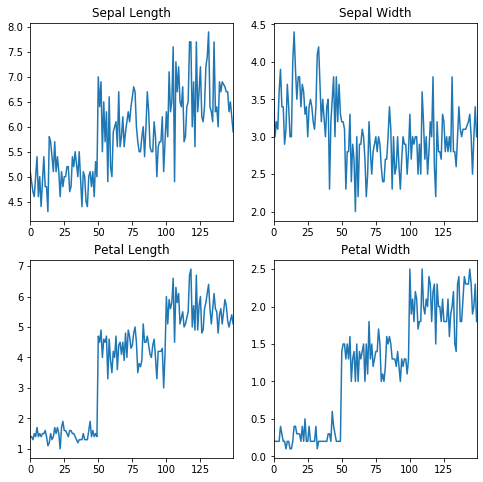

In [20]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

iris_df['SepalLengthCm'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Sepal Length')

iris_df['SepalWidthCm'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Sepal Width')

iris_df.PetalLengthCm.plot.line(ax=ax[1][0])
ax[1][0].set_title('Petal Length')

iris_df.PetalWidthCm.plot.line(ax=ax[1][1])
ax[1][1].set_title('Petal Width')

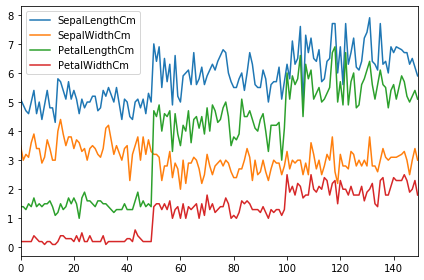

In [21]:
iris_df.plot()
plt.tight_layout()

#### Histogram

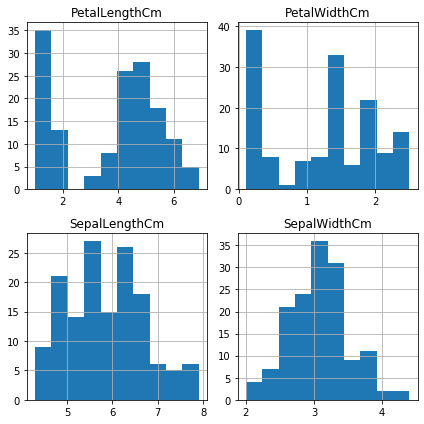

In [22]:
iris_df.hist(figsize=(6,6))
plt.tight_layout()

#### Boxplot

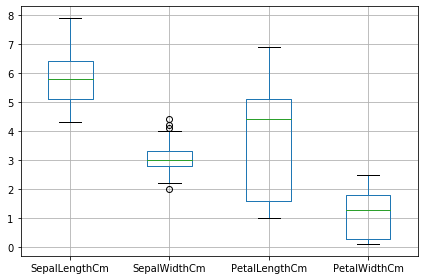

In [23]:
iris_df.boxplot()
plt.tight_layout()

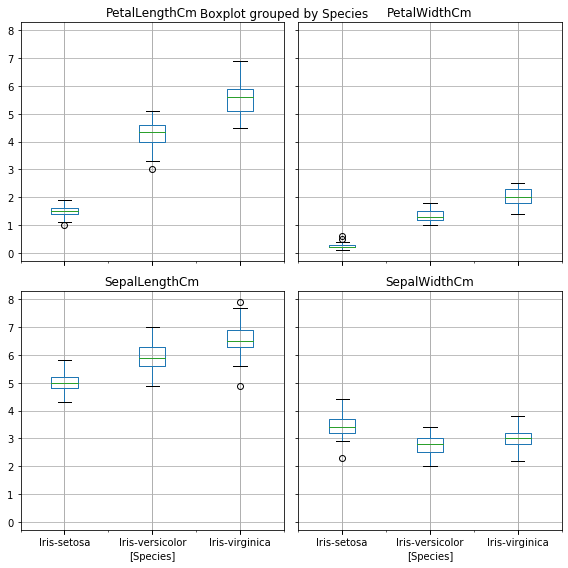

In [24]:
iris_df.boxplot(by="Species", figsize=(8,8))
plt.tight_layout()

#### Pair Plot

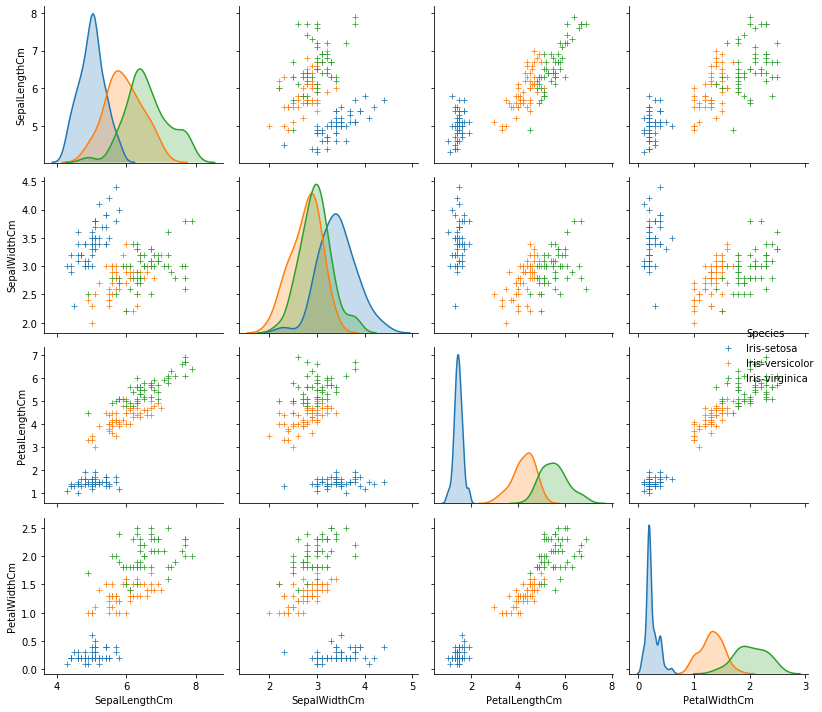

In [25]:
sns.pairplot(iris_df, hue='Species', markers='+')
plt.tight_layout()

#### Scatter Plot

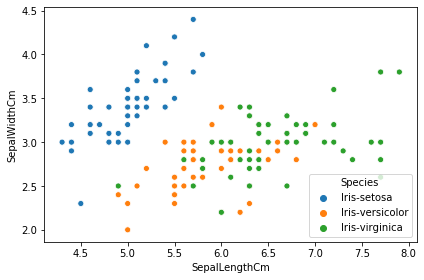

In [52]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris_df, hue='Species')
plt.tight_layout()

#### Violin Plot

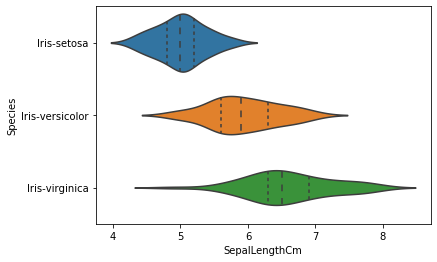

In [27]:
sns.violinplot(data=iris_df, y='Species', x='SepalLengthCm', inner='quartile')

## Iris Dataset: Classification Models

#### Import Modules

In [28]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

#### Dataset

In [29]:
X = iris_df.drop(columns='Species') # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y = iris_df['Species'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

#### Split the dataset into a training set and a testing set

In [31]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(88, 4)
(88,)

testing dataset:
(59, 4)
(59,)


#### K Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

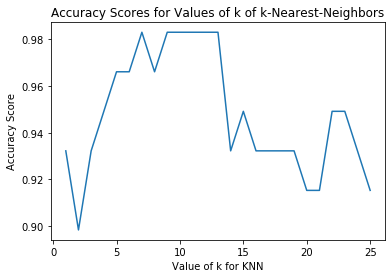

In [34]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [35]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

##### Accuracy Score

In [36]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.9322033898305084


##### Confusion Matrix

In [53]:
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[18  0  0]
 [ 0 20  1]
 [ 0  2 18]]


##### Classification Report

In [38]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.90      0.90      0.90        21
 Iris-virginica       0.90      0.90      0.90        20

       accuracy                           0.93        59
      macro avg       0.93      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

##### Accuracy Score

In [41]:
print(accuracy_score(y_test, y_pred))

0.9322033898305084


##### Confusion Matrix

In [42]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 0 20  1]
 [ 0  3 17]]


##### Classification Report

In [43]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.87      0.95      0.91        21
 Iris-virginica       0.94      0.85      0.89        20

       accuracy                           0.93        59
      macro avg       0.94      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



#### Support Vector Classifier

In [44]:
from sklearn.svm import SVC

In [45]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

#### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

#### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

#### Accuracy comparision for various models.

In [50]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814]


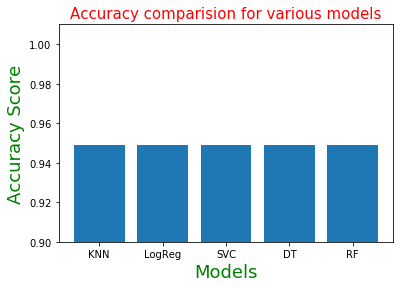

In [51]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.90,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.show()